# 💼 Loan Approval Prediction Using Machine Learning

## 🎯 Objective
To develop a predictive model that determines whether a loan application will be approved based on applicant attributes and financial data.

## 🧾 Dataset
- Loan_ID, Gender, Married, Education, ApplicantIncome, Credit_History, etc.
- Target variable: `Loan_Status` (Y = Approved, N = Not Approved)

## 🛠️ Techniques
- Data Cleaning & Imputation
- Categorical Encoding
- Feature Engineering
- Random Sampling for Imbalanced Classes
- Model Evaluation: Precision, Recall, F1, ROC-AUC
- Visualization for Data Insights


## **Loading of Dataset**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-prediction-dataset


## **Preprocessing**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
           loan_id  no_of

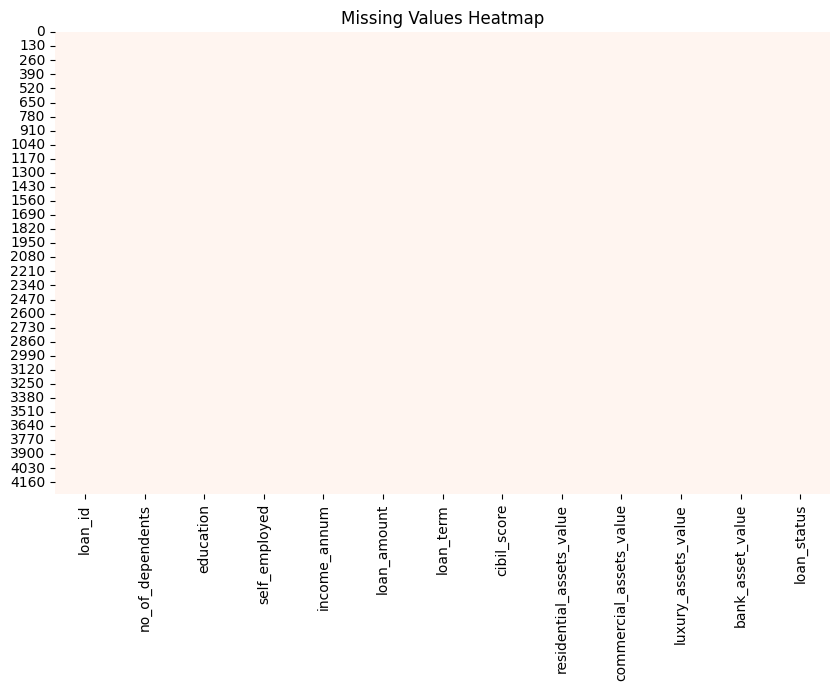

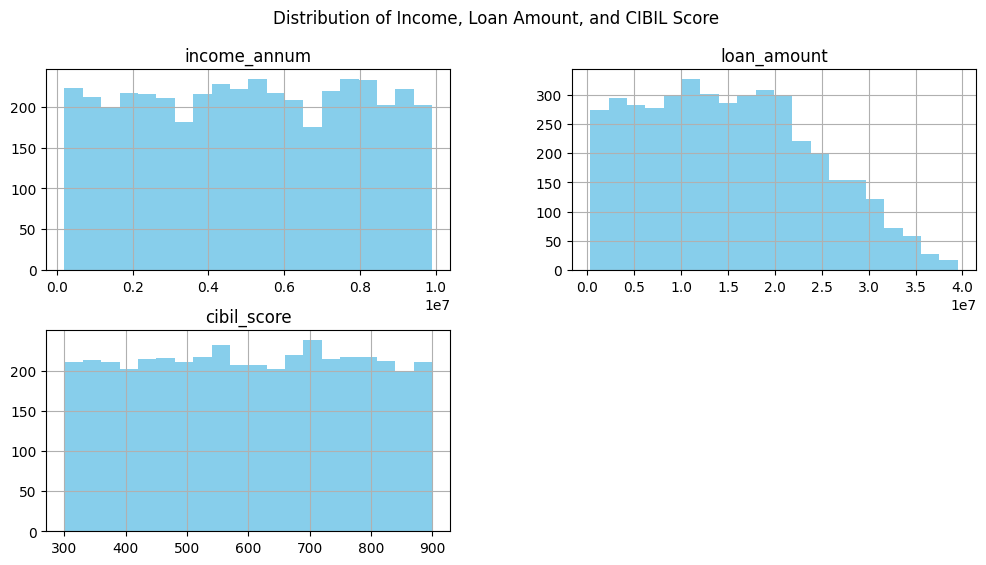

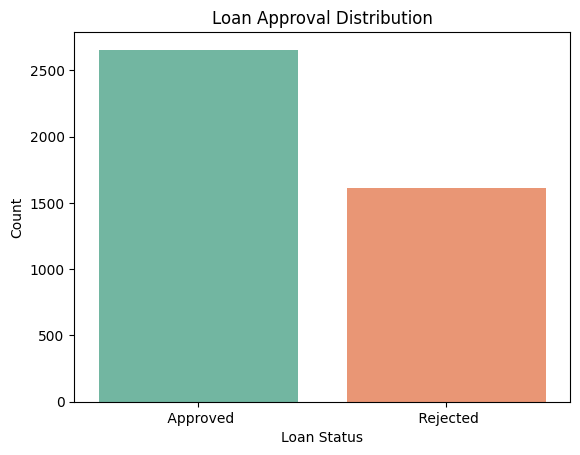

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

# Strip whitespace and lowercase all column names for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Quick overview
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 🔍 Missing Value Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

# 📊 Distribution of numerical features
num_cols = ['income_annum', 'loan_amount', 'cibil_score']
df[num_cols].hist(bins=20, figsize=(12, 6), color='skyblue')
plt.suptitle("Distribution of Income, Loan Amount, and CIBIL Score")
plt.show()

# 🎯 Target Variable Distribution
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [3]:
# Clean column names first
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Check cleaned columns
print(df.columns)

# Fill missing values (if any exist)
for col in ['no_of_dependents', 'education', 'self_employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
            'residential_assets_value', 'commercial_assets_value',
            'luxury_assets_value', 'bank_asset_value']:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

cat_cols = ['no_of_dependents', 'education', 'self_employed', 'loan_status']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Optional: Preview dataset
df.head()


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


/tmp/ipykernel_121/3764866465.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_121/3764866465.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [4]:
# First, clean column names again if not already done
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# ✅ Create engineered features
df['asset_total'] = (
    df['residential_assets_value'] +
    df['commercial_assets_value'] +
    df['luxury_assets_value'] +
    df['bank_asset_value']
)

df['income_loan_ratio'] = df['income_annum'] / df['loan_amount']
df['loan_to_assets_ratio'] = df['loan_amount'] / (df['asset_total'] + 1)  # avoid division by zero

# ✅ Drop ID column
df.drop(['loan_id'], axis=1, inplace=True)


## **Splitting & Training**

In [5]:
from sklearn.model_selection import train_test_split

# Make sure column name is lowercase and cleaned
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
from sklearn.utils import resample
import pandas as pd

# Combine features and target temporarily for easy sampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority class
majority = train_data[train_data['loan_status'] == 1]
minority = train_data[train_data['loan_status'] == 0]

# Oversample minority class
minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

# Combine majority and oversampled minority
upsampled_train = pd.concat([majority, minority_upsampled])

# Split back into features and target
X_train_res = upsampled_train.drop('loan_status', axis=1)
y_train_res = upsampled_train['loan_status']

# Check the new class distribution
print("Resampled Class Distribution:\n", y_train_res.value_counts())


Resampled Class Distribution:
 loan_status
1    1290
0    1290
Name: count, dtype: int64


## **Results and Visualization**


🔍 Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.67      0.53      0.59       531
           1       0.42      0.57      0.49       323

    accuracy                           0.55       854
   macro avg       0.55      0.55      0.54       854
weighted avg       0.58      0.55      0.55       854



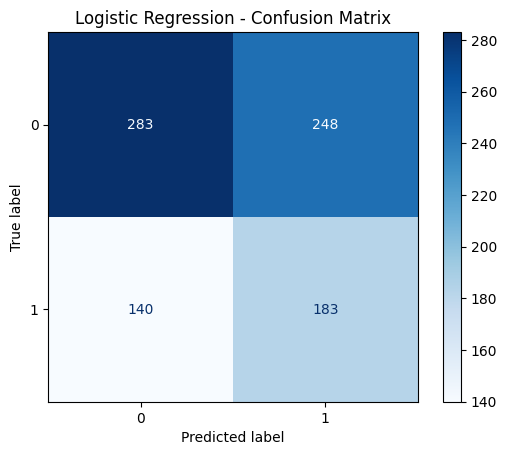


🔍 Decision Tree Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       531
           1       1.00      1.00      1.00       323

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



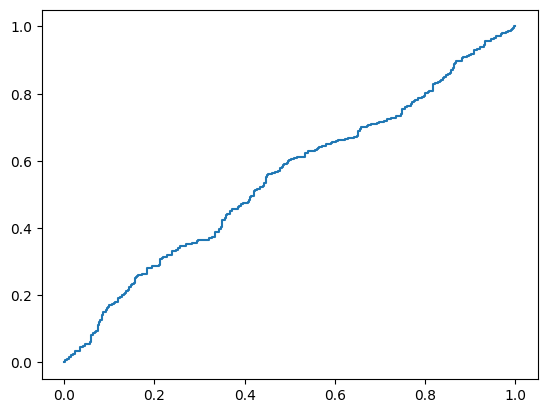

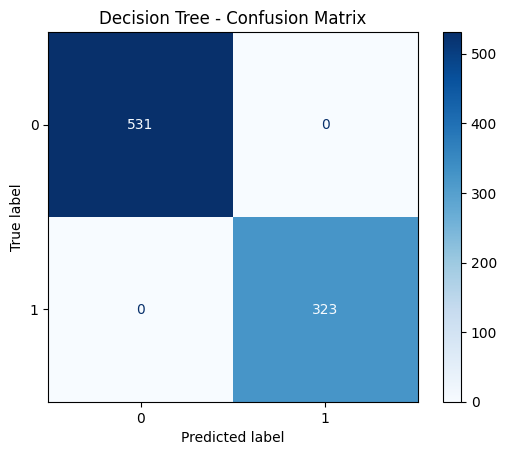

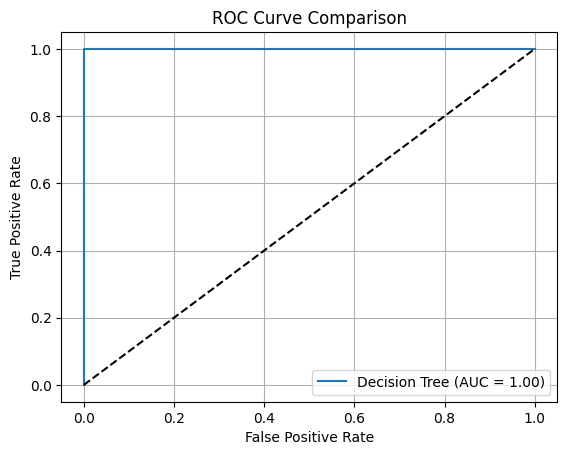

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    print(f"\n🔍 {name} Evaluation")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


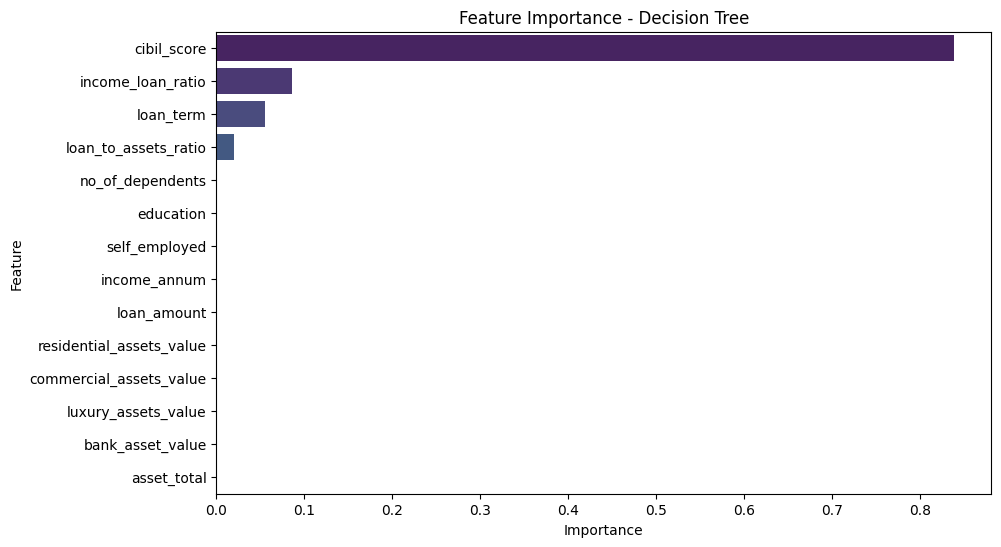

In [9]:
importances = models["Decision Tree"].feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Decision Tree")
plt.show()
